Building CNN

#Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf


# Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() # load dataset from  keras

In [3]:
X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0] #9 => Ankle boot

9

In [6]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''
 
"""## Show image"""

'## Show image'

# Show Images

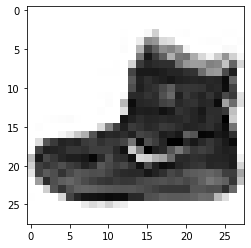

In [7]:
plt.imshow(X_train[0], cmap='Greys')

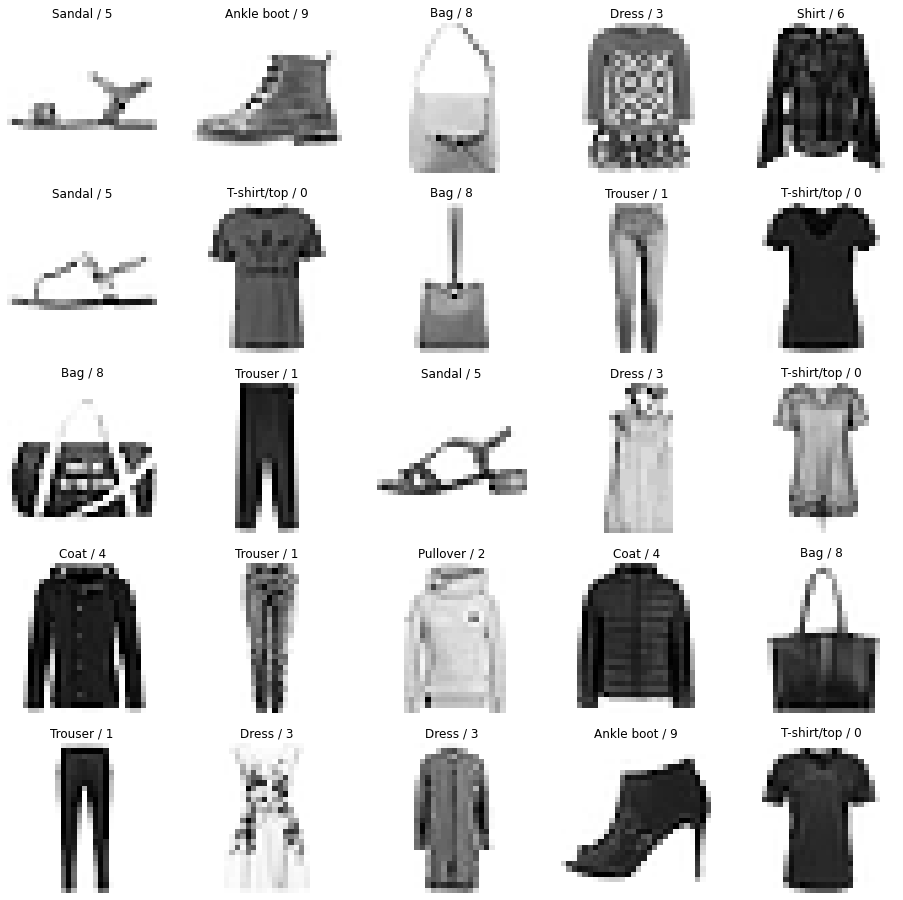

In [8]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [9]:
X_train.shape

(60000, 28, 28)

# Dimention

In [10]:
X_train.ndim

3

In [11]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
 

In [12]:
X_train.ndim

4

# Feature Scaling

In [13]:
X_train = X_train/255
X_test = X_test/255
 

# Split DataSet

In [14]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [15]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

# Model Building

In [16]:
from tensorflow.keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    MaxPooling2D
)

INPUT_SHAPE = (28, 28, 1)
NUM_CLASSES = 10

model = keras.Sequential()
model.add(
    Conv2D(
        filters=16,
        kernel_size=3,
        activation='relu',
        input_shape=INPUT_SHAPE
    )
)
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.25))
model.add(Conv2D(32, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(NUM_CLASSES, activation='softmax'))




In [17]:
# complie the model
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
# train cnn model
model.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 49s 508ms/step - loss: 1.4404 - accuracy: 0.4889 - val_loss: 0.5911 - val_accuracy: 0.7711
Epoch 2/50
94/94 [==============================] - 44s 463ms/step - loss: 0.6030 - accuracy: 0.7668 - val_loss: 0.4817 - val_accuracy: 0.8197
Epoch 3/50
94/94 [==============================] - 43s 458ms/step - loss: 0.5078 - accuracy: 0.8050 - val_loss: 0.4282 - val_accuracy: 0.8406
Epoch 4/50
94/94 [==============================] - 44s 465ms/step - loss: 0.4536 - accuracy: 0.8317 - val_loss: 0.3826 - val_accuracy: 0.8564
Epoch 5/50
94/94 [==============================] - 44s 466ms/step - loss: 0.4068 - accuracy: 0.8487 - val_loss: 0.3474 - val_accuracy: 0.8689
Epoch 6/50
94/94 [==============================] - 43s 462ms/step - loss: 0.3736 - accuracy: 0.8618 - val_loss: 0.3334 - val_accuracy: 0.8752
Epoch 7/50
94/94 [==============================] - 44s 469ms/step - loss: 0.3595 - accuracy: 0.8685 - val_loss: 0.3117 - val_accuracy: 0.8826

# Test The Model

In [19]:
model.predict(np.expand_dims(X_test[0], axis=0)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [20]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(2))

9

In [21]:
y_test[0]

9

In [22]:
y_pred = model.predict(X_test).round(2)
y_pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2308 - accuracy: 0.9218


[0.23075492680072784, 0.9218000173568726]

# Visualize Output

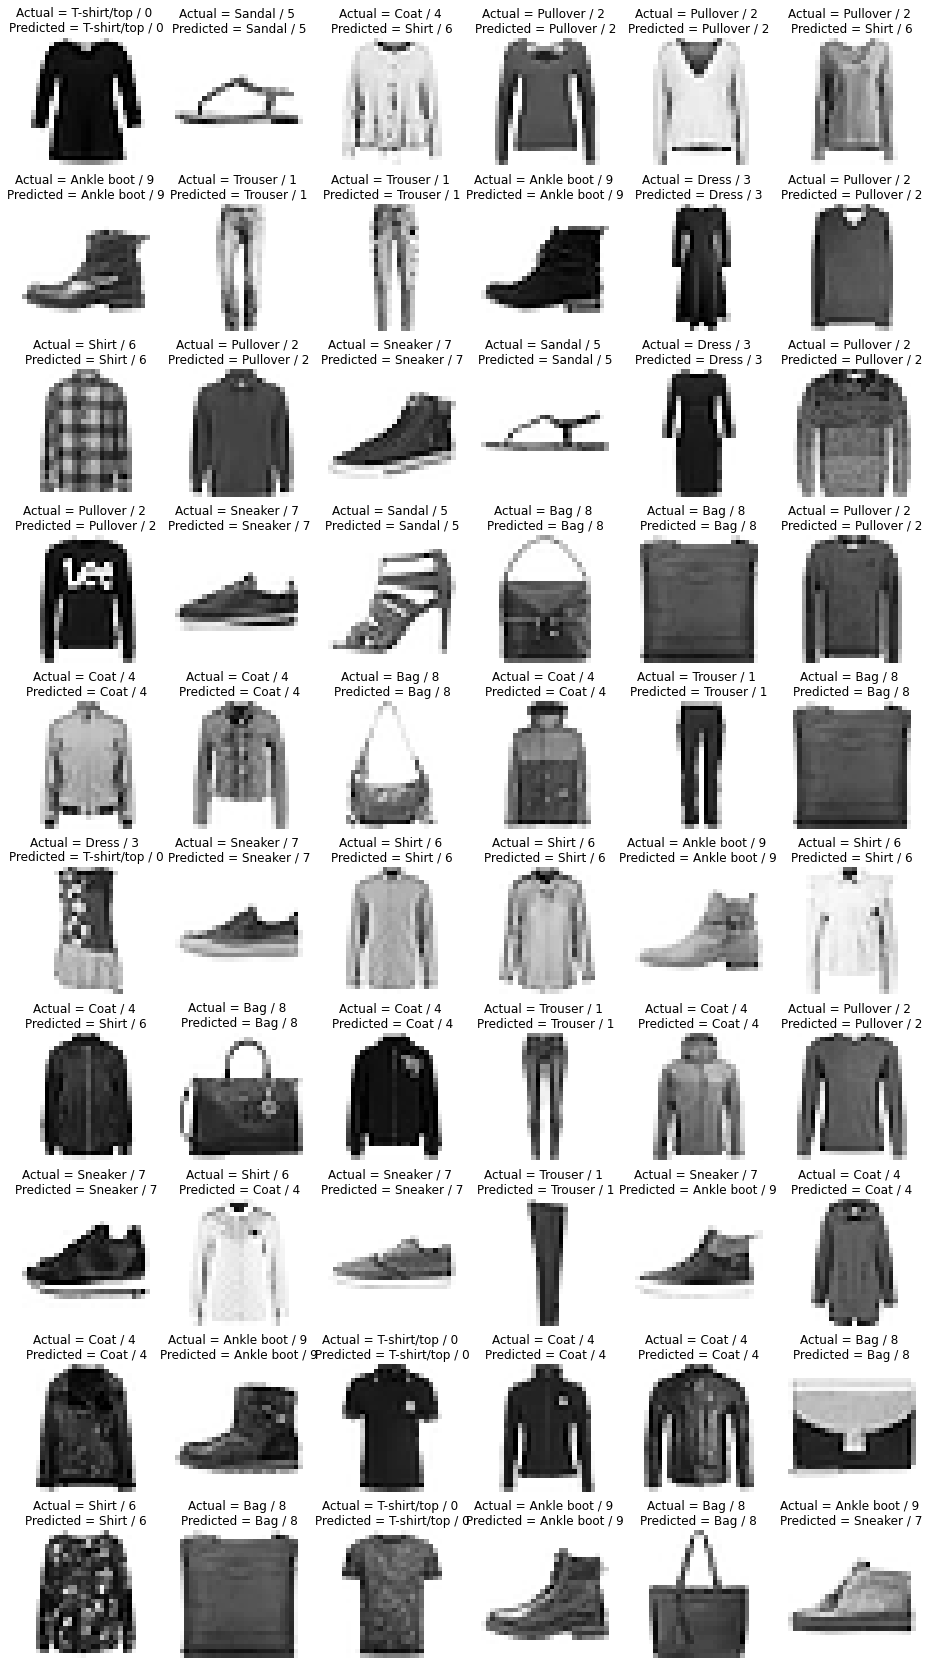

In [24]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

# Confusion Matrix

<AxesSubplot:>

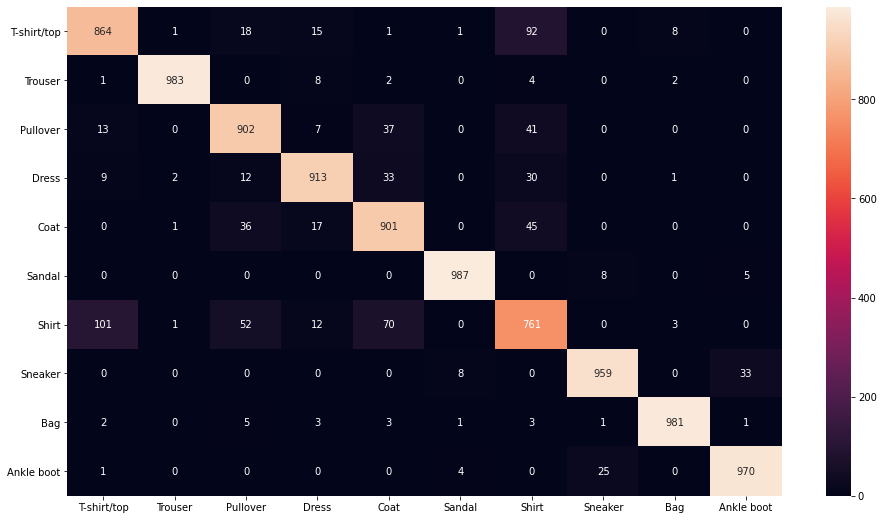

In [25]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))

y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels,yticklabels=class_labels)

In [26]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.86      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.90      0.89      1000
       Dress       0.94      0.91      0.92      1000
        Coat       0.86      0.90      0.88      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.78      0.76      0.77      1000
     Sneaker       0.97      0.96      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# Save Model

In [27]:
model.save('fashion_mnist_model.h5')

In [34]:
# Load model
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_model.h5')
 
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample
 
np.argmax(Y_pred_sample[0])
 
y_test[0]




9

In [36]:
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_model.h5')
 
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[4], axis=0)).round(2)
Y_pred_sample

array([[0.14, 0.  , 0.01, 0.  , 0.  , 0.  , 0.84, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [39]:
np.argmax(Y_pred_sample)

6

In [40]:
y_test[4]

6

In [43]:
pip install tensorflowjs
import tensorflowjs as tfjs  
tfjs.converters.save_keras_model(model, './')

SyntaxError: invalid syntax (<ipython-input-43-e6fd6bf748c5>, line 1)